In [1]:
%matplotlib inline
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

np.random.seed(0)

In [2]:
data = pd.read_csv('../data/train_month_3_with_target.csv',parse_dates = [29,30,32], index_col = 'client_id')
data.dtypes

homebanking_active                            int64
has_homebanking                               int64
has_insurance_21                              int64
has_insurance_23                              int64
has_life_insurance_fixed_cap                  int64
has_life_insurance_decreasing_cap             int64
has_fire_car_other_insurance                  int64
has_personal_loan                             int64
has_mortgage_loan                             int64
has_current_account                           int64
has_pension_saving                            int64
has_savings_account                           int64
has_savings_account_starter                   int64
has_current_account_starter                   int64
bal_insurance_21                              int64
bal_insurance_23                              int64
cap_life_insurance_fixed_cap                  int64
cap_life_insurance_decreasing_cap             int64
prem_fire_car_other_insurance                 int64
bal_personal

In [3]:
#non sample-dependent transformations
date_features = data.select_dtypes(include = ['datetime64'])
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

#initialise target and select features

selected_col = ['homebanking_active'
              ,'has_homebanking'
              ,'bal_mortgage_loan'
              ,'has_life_insurance_decreasing_cap'
              ,'has_mortgage_loan'
              ,'has_current_account'
              ,'cap_life_insurance_decreasing_cap'
              ,'bal_savings_account'
              ,'bal_current_account'
              ,'has_personal_loan'
              ,'bal_personal_loan'
              ,'customer_since_all_years'
              ,'customer_since_bank_years'
              ,'customer_age'   
         ]
y = data.target
X = data.drop(columns = ['target'])
X = X[selected_col]
print(X.dtypes)
display(X.head(5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

homebanking_active                     int64
has_homebanking                        int64
bal_mortgage_loan                      int64
has_life_insurance_decreasing_cap      int64
has_mortgage_loan                      int64
has_current_account                    int64
cap_life_insurance_decreasing_cap      int64
bal_savings_account                    int64
bal_current_account                    int64
has_personal_loan                      int64
bal_personal_loan                      int64
customer_since_all_years             float64
customer_since_bank_years            float64
customer_age                           int64
dtype: object


,homebanking_active,has_homebanking,bal_mortgage_loan,has_life_insurance_decreasing_cap,has_mortgage_loan,has_current_account,cap_life_insurance_decreasing_cap,bal_savings_account,bal_current_account,has_personal_loan,bal_personal_loan,customer_since_all_years,customer_since_bank_years,customer_age
client_id,,,,,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,1,0,22000,590,0,0,35.0,24.0,75
4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,1,0,10570,940,0,0,1.0,1.0,24
f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,1,0,15200,1210,0,0,38.0,38.0,82
26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,0,29020,0,0,0,20.0,5.0,72
c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,13650,0,0,0,6.0,6.0,22


In [4]:
X_train.columns

Index(['homebanking_active', 'has_homebanking', 'bal_mortgage_loan',
       'has_life_insurance_decreasing_cap', 'has_mortgage_loan',
       'has_current_account', 'cap_life_insurance_decreasing_cap',
       'bal_savings_account', 'bal_current_account', 'has_personal_loan',
       'bal_personal_loan', 'customer_since_all_years',
       'customer_since_bank_years', 'customer_age'],
      dtype='object')

In [5]:
#sample dependent column specific preprocessing
from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer

binner = Pipeline(steps=[
    ('impute',SimpleImputer(missing_values=np.nan, strategy='median'))
    ,('bin',KBinsDiscretizer(n_bins=5, encode='ordinal'))
])

columns_to_bin = ['customer_since_all_years','customer_since_bank_years','customer_age']

preprocessor = ColumnTransformer(
    transformers=[
        ("bin", binner, ['customer_age']),
        ('impute',SimpleImputer(missing_values=np.nan, strategy='mean'),['customer_since_all_years','customer_since_bank_years'])
    ],
    remainder = "passthrough"
)

In [6]:
#balance classes 50:50
smt = SMOTE(random_state=42)

#classifier
rf = RandomForestClassifier(max_depth=5,n_estimators = 100,random_state=0)

#pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),("balancer", smt), ("classifier", rf)]
)
# pipe = Pipeline(
#     steps=[("balancer", smt), ("classifier", rf)]
# )

# train 
clf = pipe.fit(X_train,y_train)

# make prediction on test
y_pred_test = clf.predict(X_test)
y_pred_test_probs = clf.predict_proba(X_test)
y_pred_test_probs = [x[1] for x in y_pred_test_probs]

               precision    recall  f1-score   support

Did not Churn       0.98      0.85      0.91     30889
        Churn       0.08      0.38      0.13       960

     accuracy                           0.84     31849
    macro avg       0.53      0.62      0.52     31849
 weighted avg       0.95      0.84      0.89     31849

AUC (area under roc curve): 0.62 



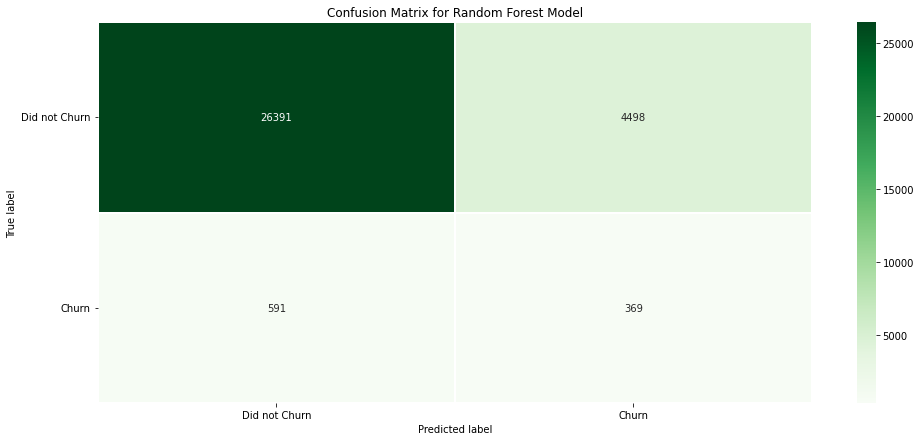

In [7]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report,auc
from sklearn.metrics import roc_curve,auc

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)

# Build the plot
plt.figure(figsize=(16,7))
sns.heatmap(matrix, 
            annot=True,
            fmt='g',
            cmap=plt.cm.Greens, 
            linewidths=0.2)

# Add labels to the plot
class_names = ['Did not Churn', 'Churn']
tick_marks = np.arange(len(class_names))+0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')


print(classification_report(y_test, y_pred_test,target_names = class_names))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
AUC = auc(fpr, tpr)
print("AUC (area under roc curve): %.2f \n" % AUC)

plt.show()

In [11]:
# At top 250 predictions

# y_pred_250 
y_pred_250 = pd.DataFrame({'y':y_test,'y_pred':y_pred_test,'y_pred_prob':y_pred_test_probs}).sort_values(by ='y_pred_prob',ascending=False)
y_pred_250 = y_pred_250.head(250)
y_pred_250

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_pred_250.y, y_pred_250.y_pred)
fpr, tpr, thresholds = roc_curve(y_pred_250.y, y_pred_250.y_pred)
AUC = auc(fpr, tpr)

print("No. of TP (precision@250): %i" % matrix[-1,-1])
print("AUC: %.3f" % AUC)
# print(classification_report(y_pred_250.y, y_pred_250.y_pred,target_names = class_names))


No. of TP (precision@250): 27
AUC: 0.500
